<a href="https://colab.research.google.com/github/corioIA/Projet_IA/blob/main/IA_bat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
df=pd.read_csv('Battery_RUL.csv')

df.head(10)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
9,11.0,435251.49,263086.078000,4.267,3.086,269.984000,443700.02,443700.02,1102


In [4]:
df.shape


(15064, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


<Axes: ylabel='Cycle_Index'>

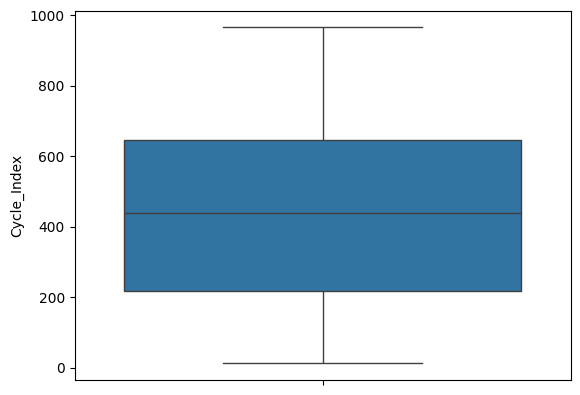

In [29]:
#Analyse descreptive de la variable Cycle_Index
sns.boxplot(data=df, y="Cycle_Index")


<Axes: ylabel='Discharge Time (s)'>

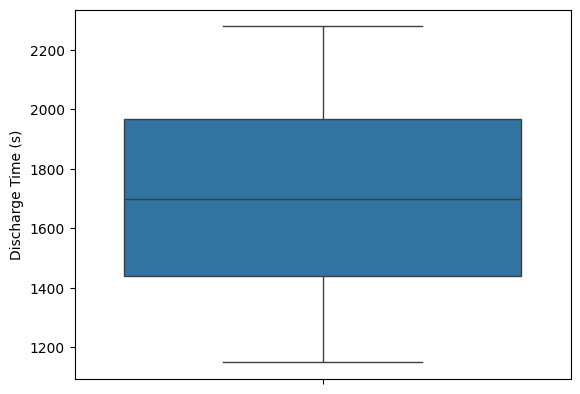

In [28]:
#Analyse descreptive de la variable Discharge Time
sns.boxplot(data=df, y="Discharge Time (s)")

In [27]:
df=df[df['Discharge Time (s)']>=1150]
df=df[df['Discharge Time (s)']<=2500]
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000
mean,435.220398,1697.525035,524.374377,3.933421,3.547025,3413.382436,4303.506370,8496.011325,675.131546
std,250.499776,317.559320,151.087546,0.056033,0.107198,1015.345478,1095.108221,550.399590,250.623807
min,12.000000,1150.050000,301.028571,3.794000,3.355000,-113.584000,5.980000,5.980000,142.000000
25%,217.000000,1440.000000,396.000000,3.885000,3.472000,2564.346000,3419.055000,8146.750000,467.000000
50%,439.000000,1700.000000,493.000000,3.935000,3.540000,3399.552000,4328.315000,8495.460000,672.000000
75%,645.000000,1968.000000,636.800000,3.979000,3.611000,4285.155250,5228.340000,8845.982500,893.000000
max,966.000000,2278.750000,936.000000,4.050000,4.379000,5480.352000,17036.970000,18264.560000,1121.000000


<Axes: ylabel='Decrement 3.6-3.4V (s)'>

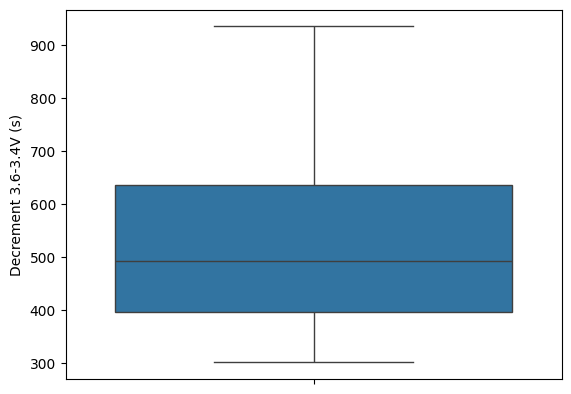

In [31]:
#Analyse descreptive de la variable Decrement 3.6-3.4V
sns.boxplot(data=df, y="Decrement 3.6-3.4V (s)")

In [30]:
#Suppression des valuers abérantes.
df=df[df['Decrement 3.6-3.4V (s)']>=0] # on affecte au dataframe toute les valeur qui n'ont pas de Decrement 3.6-3.4V (s) < 0 ce qui supprime ainsi toute les valeurs negative. Un temps négatif n'existant pas
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000
mean,435.220398,1697.525035,524.374377,3.933421,3.547025,3413.382436,4303.506370,8496.011325,675.131546
std,250.499776,317.559320,151.087546,0.056033,0.107198,1015.345478,1095.108221,550.399590,250.623807
min,12.000000,1150.050000,301.028571,3.794000,3.355000,-113.584000,5.980000,5.980000,142.000000
25%,217.000000,1440.000000,396.000000,3.885000,3.472000,2564.346000,3419.055000,8146.750000,467.000000
50%,439.000000,1700.000000,493.000000,3.935000,3.540000,3399.552000,4328.315000,8495.460000,672.000000
75%,645.000000,1968.000000,636.800000,3.979000,3.611000,4285.155250,5228.340000,8845.982500,893.000000
max,966.000000,2278.750000,936.000000,4.050000,4.379000,5480.352000,17036.970000,18264.560000,1121.000000


<Axes: ylabel='Max. Voltage Dischar. (V)'>

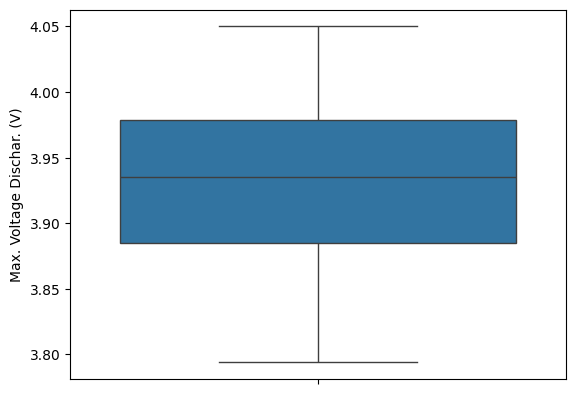

In [49]:
#Analyse descreptive de la variable Max. Voltage Dischar.
sns.boxplot(data=df, y="Max. Voltage Dischar. (V)")

<Axes: ylabel='Min. Voltage Charg. (V)'>

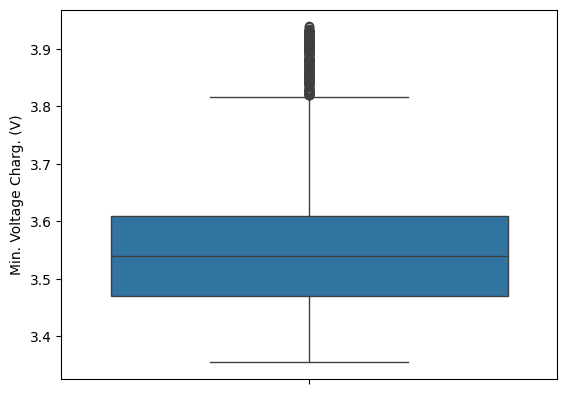

In [48]:
#Analyse descreptive de la variable Min. Voltage Charg.
sns.boxplot(data=df, y="Min. Voltage Charg. (V)")

<Axes: ylabel='Time at 4.15V (s)'>

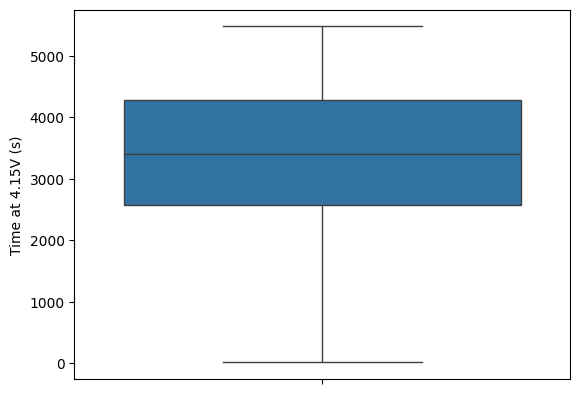

In [33]:
#Analyse descreptive de la variable Time at 4.15V
sns.boxplot(data=df, y="Time at 4.15V (s)")

In [36]:
#Suppression des valeurs abérantes de la colonne Time at 4.15V (s).
df.loc[df['Time at 4.15V (s)']<0]
df=df[df['Time at 4.15V (s)']>=0]
df.describe()


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000
mean,435.197015,1697.576595,524.414414,3.933433,3.546535,3415.843167,4306.368512,8499.352153,675.154823
std,250.569154,317.630292,151.125538,0.056044,0.105634,1011.499108,1090.194670,534.596806,250.691967
min,12.000000,1150.050000,301.028571,3.794000,3.355000,14.052000,5.980000,1124.350000,142.000000
25%,217.000000,1440.000000,396.000000,3.885000,3.471250,2569.683643,3428.250000,8147.950000,467.000000
50%,439.000000,1699.845000,493.000000,3.935000,3.540000,3402.160000,4328.320000,8496.220000,672.000000
75%,645.000000,1968.000000,636.800000,3.979000,3.611000,4285.171250,5228.340000,8846.180000,893.750000
max,966.000000,2278.750000,936.000000,4.050000,4.300000,5480.352000,17036.970000,18264.560000,1121.000000


<Axes: ylabel='Time constant current (s)'>

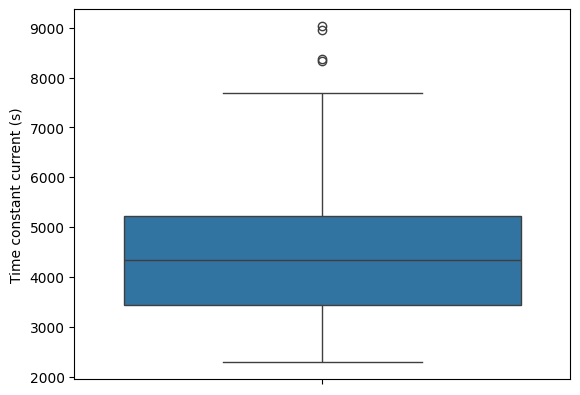

In [47]:
#Analyse descreptive de la variable Time constant current
sns.boxplot(data=df, y="Time constant current (s)")

<Axes: ylabel='Charging time (s)'>

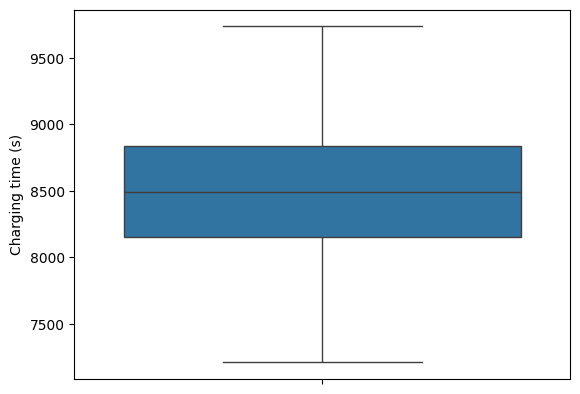

In [44]:
#Analyse descreptive de la variable Charging time (s).
sns.boxplot(data=df, y="Charging time (s)")

In [43]:
#Suppression des valeurs abérantes.
df=df[df['Charging time (s)']>=7200]
df=df[df['Charging time (s)']<=9750]
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,11149.000000,11149.000000,11149.000000,11149.000000,11149.000000,11149.000000,11149.000000,11149.000000,11149.00000
mean,434.781684,1698.077280,524.655546,3.933592,3.545135,3420.793128,4308.447387,8491.976341,675.57763
std,250.643163,317.624733,150.996118,0.055995,0.103319,1007.014428,1079.255241,469.188868,250.76899
min,13.000000,1150.050000,301.028571,3.794000,3.355000,1452.828500,2289.000000,7208.350000,142.00000
25%,216.000000,1440.000000,396.000000,3.885000,3.471000,2570.375000,3428.290000,8148.800000,467.00000
50%,438.000000,1702.330000,494.000000,3.935000,3.539000,3404.353000,4328.310000,8492.340000,672.00000
75%,645.000000,1968.640000,637.600000,3.979000,3.610000,4292.344000,5228.340000,8836.000000,894.00000
max,966.000000,2276.260000,933.600000,4.050000,3.939000,5271.553000,9031.560000,9739.010000,1121.00000


<Axes: ylabel='RUL'>

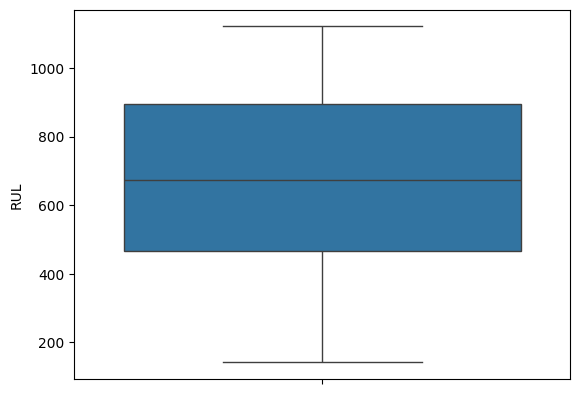

In [45]:
#Analyse descreptive de la variable RUL
sns.boxplot(data=df, y="RUL")

In [ ]:
#Recherche de doublon dans le dataSet
df.duplicated().sum() # Il n'y a pas de doublon

0

<Axes: >

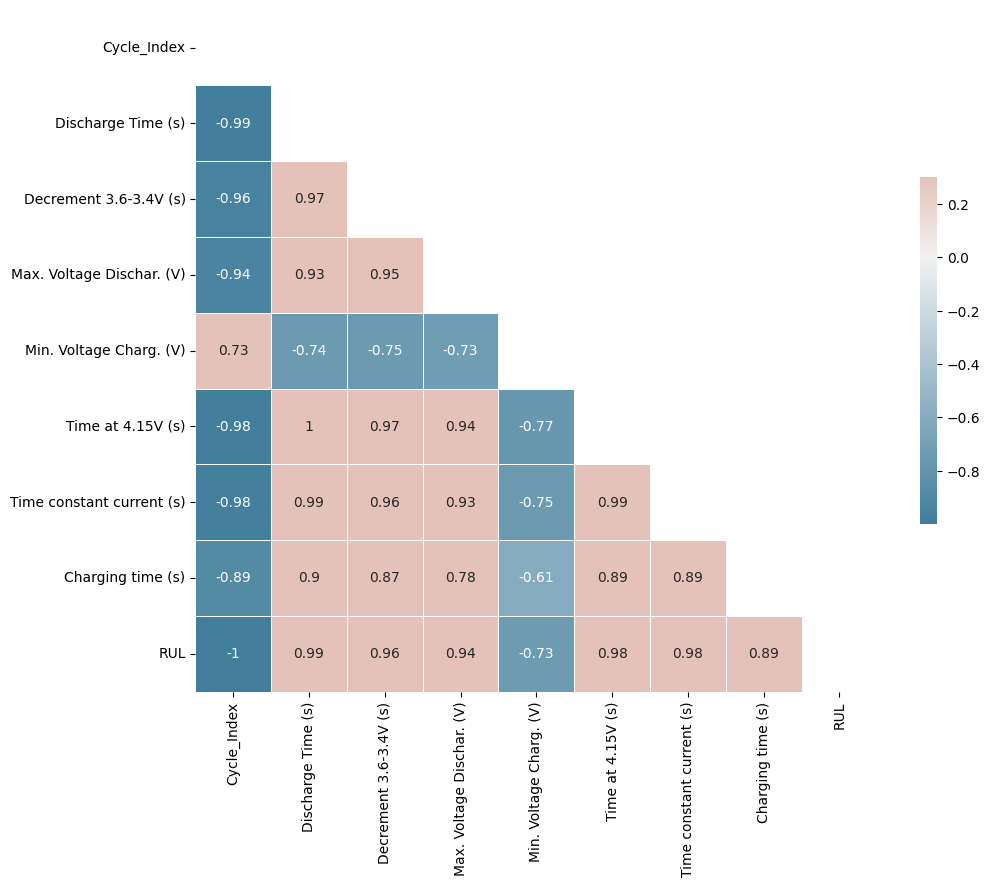

In [61]:
#Matrice de corrélation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='Discharge Time (s)', ylabel='Time at 4.15V (s)'>

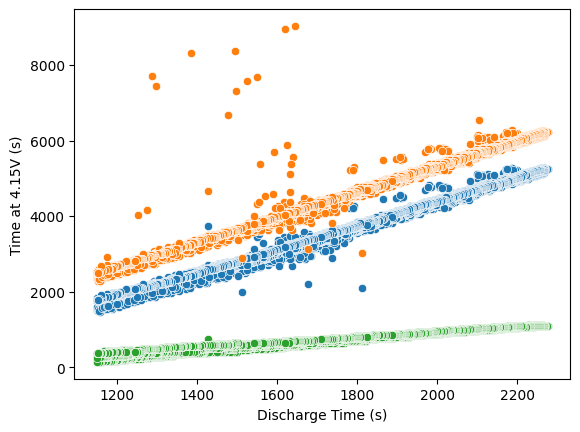

In [60]:
#Courbe bivariable

sns.scatterplot(data=df,x='Discharge Time (s)',y='Time at 4.15V (s)')
sns.scatterplot(data=df,x='Discharge Time (s)',y='Time constant current (s)')
sns.scatterplot(data=df,x='Discharge Time (s)',y='RUL')

# En faire d'autre peut etre ??


In [ ]:
#Feature engineering
